In [1]:
#imports
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [2]:
#data import
main_df = pd.read_csv ('../data/cleaned_energy_data.csv')
main_df.head()

,country,year,population,life_expectancy,consumption_per_capita,consumption_per_GDP,ppp_2015USD,production_total,production_coal,production_natural_gas,production_petrolium_and_other_liquids,production_nuclear,production_nuclear_renewables_and_other,production_renewables_and_other,consumption_total,consumption_coal,consumption_natural_gas,consumption_petrolium_and_other_liquids,consumption_nuclear,consumption_nuclear_renewables_and_other,consumption_renewables_and_other,imports_crude_oil,imports_natural_gas,imports_coal,imports_electricity,exports_crude_oil,exports_natural_gas,exports_coal,exports_electricity,emissions_co2_emissions,emissions_coal_and_coke,emissions_consumed_natural_gas,emissions_petroleum_and_other_liquids
0,World,1992,5.481774e+06,65.769659,64.426755,6.923158,51013.270526,353.718416,92.558725,76.984223,135.972335,21.27974,48.203133,26.923393,353.172922,90.407295,77.110508,137.804392,21.27974,47.850728,26.570987,31264.357,17794.06836,481679.269000,400.464479,30667.877,17854.85234,494096.4675,400.795117,22529.424264,8587.186368,4076.853622,9865.384274
1,Afghanistan,1992,1.448550e+04,51.641000,2.159523,1.042253,30.013600,0.016143,0.000158,0.011092,0.000000,NaN,0.004892,0.004892,0.031282,0.000167,0.011092,0.014684,NaN,0.005339,0.005339,0.000,0.00000,0.000000,0.131000,0.000,0.00000,0.0000,0.000000,1.704078,0.015551,0.588528,1.100000
2,Albania,1992,3.245890e+03,71.802000,25.937798,8.087302,10.410300,0.065519,0.003415,0.003760,0.025384,NaN,0.032960,0.032960,0.084191,0.005235,0.003760,0.043792,NaN,0.031404,0.031404,0.000,0.00000,104.719450,0.104000,0.000,0.00000,0.0000,0.560000,3.901890,0.502372,0.199519,3.200000
3,Algeria,1992,2.702830e+04,67.575000,48.164981,5.592648,232.773000,5.031036,0.000380,2.325281,2.703338,NaN,0.002037,0.002037,1.301818,0.028794,0.861400,0.412771,NaN,-0.001147,-0.001147,9.423,0.00000,1139.243484,0.125000,279.400,1240.61590,0.0000,1.061000,74.390488,2.687475,45.703013,26.000000
4,Angola,1992,1.265740e+04,45.230000,6.689229,1.423070,59.496900,1.152349,0.000000,0.021076,1.122669,NaN,0.008605,0.008605,0.084668,0.000000,0.021076,0.054988,NaN,0.008605,0.008605,0.000,0.00000,0.000000,0.000000,508.400,0.00000,0.0000,0.000000,5.218203,0.000000,1.118203,4.100000


In [3]:
main_df.drop(main_df[main_df['country']=='World'].index, inplace= True)

In [4]:
#checking dimensions
main_df.shape

(4697, 33)

In [5]:
set(main_df['country'])

{'Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo-Brazzaville',
 'Congo-Kinshasa',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Côte d’Ivoire',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Kong',


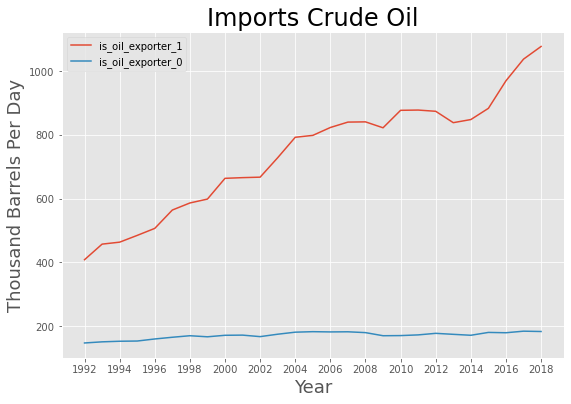

In [40]:
#code from Clarence
# making dummy columns for landlocked and nuclear countries
landlocked = ['Afghanistan', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Bhutan',
              'Bolivia', 'Botswana', 'Burkina Faso', 'Burundi', 'Central African Republic', 'Chad',
              'Czech Republic','Eswatini', 'Ethiopia', 'Hungary', 'Kazakhstan', 'Kyrgyzstan', 'Laos',
              'Lesotho', 'Liechtenstein','Luxembourg', 'Malawi', 'Mali', 'Moldova', 'Mongolia',
              'Nepal', 'Niger', 'North Macedonia', 'Paraguay','Rwanda', 'San Marino', 'Serbia',
              'Slovakia', 'South Sudan', 'Switzerland', 'Tajikistan','Turkmenistan', 'Uganda',
              'Uzbekistan', 'Vatican City', 'Zambia', 'Zimbabwe']

nuclear = ['Argentina', 'Armenia', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'China',
           'Czech Republic', 'Finland', 'France', 'Germany', 'Hungary', 'India', 'Iran', 'Japan',
           'Kazakhstan', 'Lithuania', 'Mexico', 'Netherlands', 'Pakistan', 'Romania', 'Russia',
           'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland',
           'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States']

least_developed = ['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Bhutan', 'Burkina Faso',
                   'Burundi', 'Cambodia', 'Central African Republic', 'Chad', 'Comoros',
                   'Congo-Brazzaville', 'Congo-Kinshasa', 'Djibouti', 'Ethiopia', 'Gambia, The',
                   'Guinea', 'Guinea-Bissau', 'Haiti', 'Kiribati', 'Laos',  'Lesotho', 'Liberia',
                   'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Nepal',
                   'Niger', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone',
                   'Solomon Islands', 'Somalia', 'Sudan', 'Togo', 'Uganda', 'Tanzania', 'Yemen',
                   'Zambia']

oil_exporters = ['Algeria', 'Angola', 'Congo-Brazzaville', 'Equatorial Guinea', 'Gabon', 'Iran',
                 'Iraq', 'Kuwait', 'Libya', 'Nigeria', 'Saudi Arabia', 'United Arab Emirates',
                 'Venezuela', 'United States', 'Russia', 'China']

opec = ['Algeria', 'Angola', 'Congo-Brazzaville', 'Equatorial Guinea', 'Gabon', 'Iran', 'Iraq',
        'Kuwait', 'Libya', 'Nigeria', 'Saudi Arabia', 'United Arab Emirates','Venezuela']

main_df['is_landlocked'] = main_df['country'].map(lambda x: 1 if x in landlocked else 0)
main_df['is_nuclear'] = main_df['country'].map(lambda x: 1 if x in nuclear else 0)
main_df['is_least_developed'] = main_df['country'].map(lambda x: 1 if x in least_developed else 0)
main_df['is_oil_exporter'] = main_df['country'].map(lambda x: 1 if x in oil_exporters else 0)
main_df['is_opec'] = main_df['country'].map(lambda x: 1 if x in opec else 0)

def comparison_plots(dummy_var, column):
    if not dummy_var.startswith('is_'):
        pass
    if (column.startswith('is_')) | (column == 'year') | (column == 'country'):
        pass
    
    ylabels_dict = {'population':'Thousands','life_expectancy':'Years','ppp_2015USD':'Billions in 2015USD',
                'consumption_per_capita':'Million British Thermal Units Per Capita',
                'consumption_per_GDP':'Thousand British Thermal Units Per 2015$ GDP PPP',
                'production_total':'Quadrillion British Thermal Units',
                'production_coal':'Quadrillion British Thermal Units',
                'production_natural_gas':'Quadrillion British Thermal Units',
                'production_petrolium_and_other_liquids':'Quadrillion British Thermal Units',
                'production_nuclear':'Quadrillion British Thermal Units',
                'production_nuclear_renewables_and_other':'Quadrillion British Thermal Units',
                'production_renewables_and_other':'Quadrillion British Thermal Units',
                'consumption_total':'Quadrillion British Thermal Units',
                'consumption_coal':'Quadrillion British Thermal Units',
                'consumption_natural_gas':'Quadrillion British Thermal Units',
                'consumption_petrolium_and_other_liquids':'Quadrillion British Thermal Units',
                'consumption_nuclear':'Quadrillion British Thermal Units',
                'consumption_nuclear_renewables_and_other':'Quadrillion British Thermal Units',
                'consumption_renewables_and_other':'Quadrillion British Thermal Units',
                'imports_crude_oil':'Thousand Barrels Per Day',
                'imports_natural_gas':'Billion Cubic Feet',
                'imports_coal':'Million Short Tons',
                'imports_electricity':'Billion kilowatt-hour',
                'exports_crude_oil':'Thousand Barrels Per Day',
                'exports_natural_gas':'Billion Cubic Feet',
                'exports_coal':'Million Short Tons',
                'exports_electricity':'Billion Kilowatt-Hour',
                'emissions_co2_emissions':'Million Tons CO2',
                'emissions_coal_and_coke':'Million Tons CO2',
                'emissions_consumed_natural_gas':'Million Tons CO2',
                'emissions_petroleum_and_other_liquids':'Million Tons CO2'}
    
    is_group = main_df.groupby([str(dummy_var),'year']).mean().loc[1,column]
    is_not_group = main_df.groupby([str(dummy_var),'year']).mean().loc[0,column]
    is_group.plot(figsize=(9,6), grid=True, label=dummy_var+'_1')
    is_not_group.plot(figsize=(9,6), grid=True, label=dummy_var+'_0')
    plt.title(label=column.replace('_',' ').title(), fontdict={'size':24})
    plt.xlabel(xlabel='Year', fontdict={'size':18})
    plt.xticks(list(range(1992,2020,2)))
    plt.ylabel(ylabel= ylabels_dict[column], fontdict={'size':18})
    plt.legend()

comparison_plots('is_oil_exporter','imports_crude_oil')

In [42]:
main_df.head()

,country,year,population,life_expectancy,consumption_per_capita,consumption_per_GDP,ppp_2015USD,production_total,production_coal,production_natural_gas,production_petrolium_and_other_liquids,production_nuclear,production_nuclear_renewables_and_other,production_renewables_and_other,consumption_total,consumption_coal,consumption_natural_gas,consumption_petrolium_and_other_liquids,consumption_nuclear,consumption_nuclear_renewables_and_other,consumption_renewables_and_other,imports_crude_oil,imports_natural_gas,imports_coal,imports_electricity,exports_crude_oil,exports_natural_gas,exports_coal,exports_electricity,emissions_co2_emissions,emissions_coal_and_coke,emissions_consumed_natural_gas,emissions_petroleum_and_other_liquids,is_landlocked,is_nuclear,is_least_developed,is_oil_exporter,is_opec
1,Afghanistan,1992,14485.5000,51.641,2.159523,1.042253,30.01360,0.016143,0.000158,0.011092,0.000000,NaN,0.004892,0.004892,0.031282,0.000167,0.011092,0.014684,NaN,0.005339,0.005339,0.000,0.0,0.000000,0.131,0.0,0.0000,0.0,0.000,1.704078,0.015551,0.588528,1.1,1,0,1,0,0
2,Albania,1992,3245.8900,71.802,25.937798,8.087302,10.41030,0.065519,0.003415,0.003760,0.025384,NaN,0.032960,0.032960,0.084191,0.005235,0.003760,0.043792,NaN,0.031404,0.031404,0.000,0.0,104.719450,0.104,0.0,0.0000,0.0,0.560,3.901890,0.502372,0.199519,3.2,0,0,0,0,0
3,Algeria,1992,27028.3000,67.575,48.164981,5.592648,232.77300,5.031036,0.000380,2.325281,2.703338,NaN,0.002037,0.002037,1.301818,0.028794,0.861400,0.412771,NaN,-0.001147,-0.001147,9.423,0.0,1139.243484,0.125,279.4,1240.6159,0.0,1.061,74.390488,2.687475,45.703013,26.0,0,0,0,1,1
4,Angola,1992,12657.4000,45.230,6.689229,1.423070,59.49690,1.152349,0.000000,0.021076,1.122669,NaN,0.008605,0.008605,0.084668,0.000000,0.021076,0.054988,NaN,0.008605,0.008605,0.000,0.0,0.000000,0.000,508.4,0.0000,0.0,0.000,5.218203,0.000000,1.118203,4.1,0,0,1,1,1
5,Antigua and Barbuda,1992,64.9886,72.006,91.763340,5.867116,1.01644,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.005964,0.000000,0.000000,0.005964,NaN,0.000000,0.000000,0.000,0.0,0.000000,0.000,0.0,0.0000,0.0,0.000,0.400000,0.000000,0.000000,0.4,0,0,0,0,0


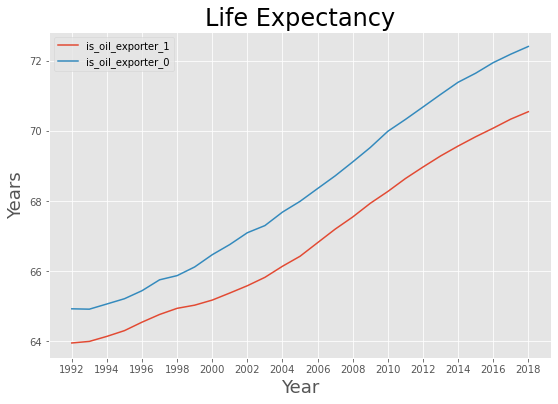

In [43]:
comparison_plots('is_oil_exporter','life_expectancy')
plt.savefig('life_expectancy_oil_exporters')

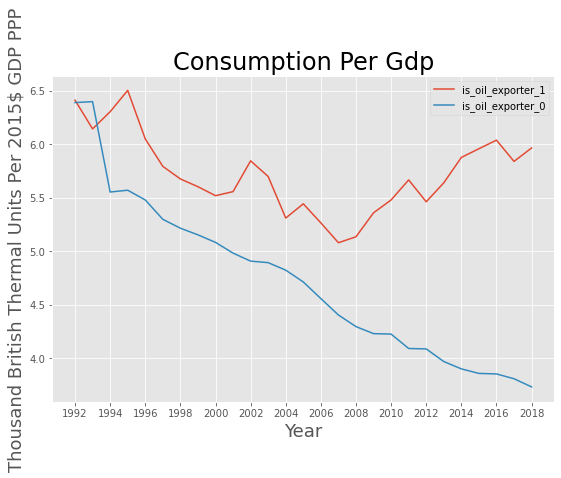

In [44]:
comparison_plots('is_oil_exporter','consumption_per_GDP')
plt.savefig ('comsumption_per_GDP_oil_exporters')

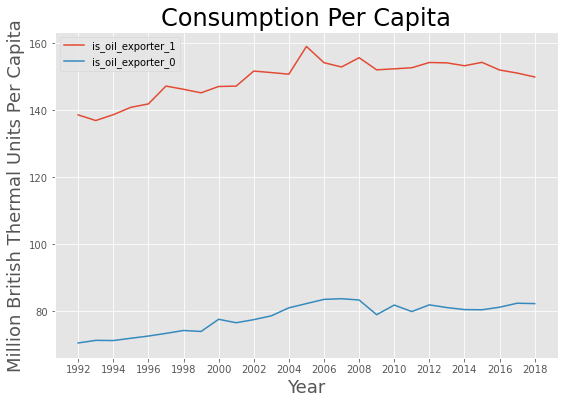

In [45]:
comparison_plots('is_oil_exporter','consumption_per_capita')
plt.savefig ('comsumption_per_capita_oil_exporters')

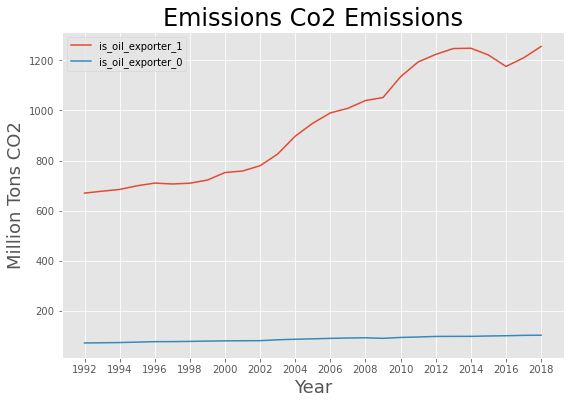

In [46]:
comparison_plots('is_oil_exporter','emissions_co2_emissions')
plt.savefig ('co2_emissions_oil_exporters')

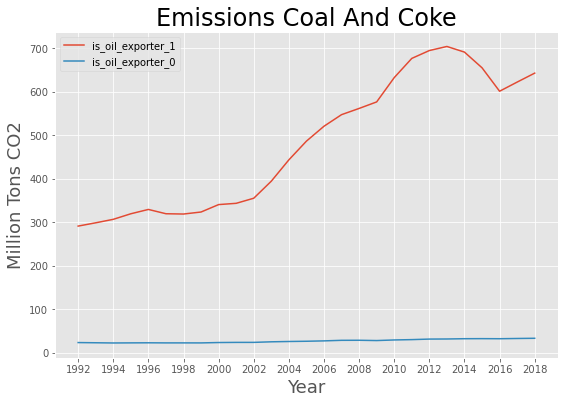

In [47]:
comparison_plots('is_oil_exporter','emissions_coal_and_coke')
plt.savefig ('coal_emissions_oil_exporters')

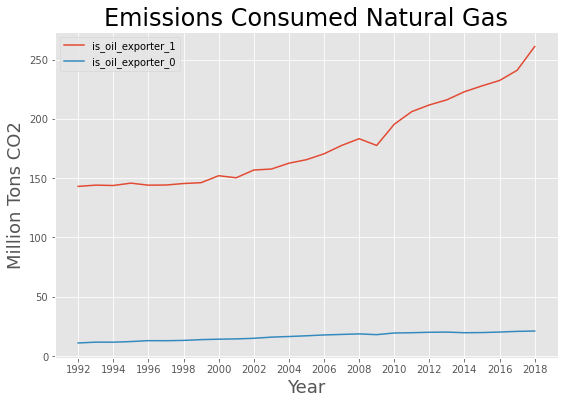

In [48]:
comparison_plots('is_oil_exporter','emissions_consumed_natural_gas')
plt.savefig ('natural_gas_emissions_oil_exporters')

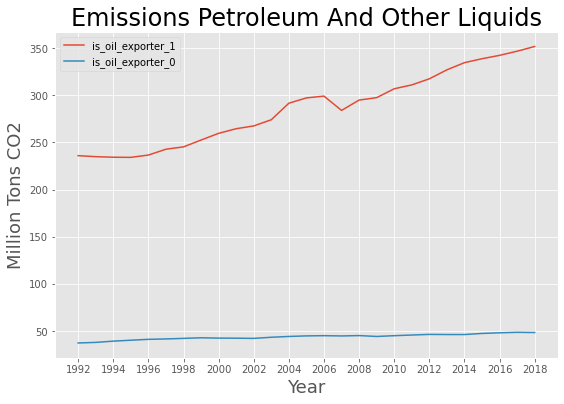

In [49]:
comparison_plots('is_oil_exporter','emissions_petroleum_and_other_liquids')
plt.savefig ('petroleum_emissions_oil_exporters')

# Modeling - Pooled OLS, Fixed Effects, Random Effects

In [50]:
#imports
from linearmodels import PooledOLS
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from linearmodels import PanelOLS
from linearmodels import RandomEffects
import numpy.linalg as la
from scipy import stats


Special credit to Bernhard Brugger, whose insightful article provided a comprehensive step by step approach to panel data regression in Python. You can view article here https://towardsdatascience.com/a-guide-to-panel-data-regression-theoretics-and-implementation-with-python-4c84c5055cf8.


In [51]:
#Reading data
df = pd.read_csv ('../data/cleaned_energy_data.csv')

In [52]:
#Creating new columns for dummy variables for sub categories 

landlocked = ['Afghanistan', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Bhutan',
              'Bolivia', 'Botswana', 'Burkina Faso', 'Burundi', 'Central African Republic', 'Chad',
              'Czech Republic','Eswatini', 'Ethiopia', 'Hungary', 'Kazakhstan', 'Kyrgyzstan', 'Laos',
              'Lesotho', 'Liechtenstein','Luxembourg', 'Malawi', 'Mali', 'Moldova', 'Mongolia',
              'Nepal', 'Niger', 'North Macedonia', 'Paraguay','Rwanda', 'San Marino', 'Serbia',
              'Slovakia', 'South Sudan', 'Switzerland', 'Tajikistan','Turkmenistan', 'Uganda',
              'Uzbekistan', 'Vatican City', 'Zambia', 'Zimbabwe']

nuclear = ['Argentina', 'Armenia', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'China',
           'Czech Republic', 'Finland', 'France', 'Germany', 'Hungary', 'India', 'Iran', 'Japan',
           'Kazakhstan', 'Lithuania', 'Mexico', 'Netherlands', 'Pakistan', 'Romania', 'Russia',
           'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland',
           'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States']

least_developed = ['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Bhutan', 'Burkina Faso',
                   'Burundi', 'Cambodia', 'Central African Republic', 'Chad', 'Comoros',
                   'Congo-Brazzaville', 'Congo-Kinshasa', 'Djibouti', 'Ethiopia', 'Gambia, The',
                   'Guinea', 'Guinea-Bissau', 'Haiti', 'Kiribati', 'Laos',  'Lesotho', 'Liberia',
                   'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Nepal',
                   'Niger', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone',
                   'Solomon Islands', 'Somalia', 'Sudan', 'Togo', 'Uganda', 'Tanzania', 'Yemen',
                   'Zambia']

oil_exporters = ['Algeria', 'Angola', 'Congo-Brazzaville', 'Equatorial Guinea', 'Gabon', 'Iran',
                 'Iraq', 'Kuwait', 'Libya', 'Nigeria', 'Saudi Arabia', 'United Arab Emirates',
                 'Venezuela', 'United States', 'Russia', 'China']

opec = ['Algeria', 'Angola', 'Congo-Brazzaville', 'Equatorial Guinea', 'Gabon', 'Iran', 'Iraq',
        'Kuwait', 'Libya', 'Nigeria', 'Saudi Arabia', 'United Arab Emirates','Venezuela']

df['is_landlocked'] = df['country'].map(lambda x: 1 if x in landlocked else 0)
df['is_nuclear'] = df['country'].map(lambda x: 1 if x in nuclear else 0)
df['is_least_developed'] = df['country'].map(lambda x: 1 if x in least_developed else 0)
df['is_oil_exporter'] = df['country'].map(lambda x: 1 if x in oil_exporters else 0)
df['is_opec'] = df['country'].map(lambda x: 1 if x in opec else 0)

In [53]:
#displaying first 5 rows and dimensions of dataframe
display(df.head())
display(df.shape)

,country,year,population,life_expectancy,consumption_per_capita,consumption_per_GDP,ppp_2015USD,production_total,production_coal,production_natural_gas,production_petrolium_and_other_liquids,production_nuclear,production_nuclear_renewables_and_other,production_renewables_and_other,consumption_total,consumption_coal,consumption_natural_gas,consumption_petrolium_and_other_liquids,consumption_nuclear,consumption_nuclear_renewables_and_other,consumption_renewables_and_other,imports_crude_oil,imports_natural_gas,imports_coal,imports_electricity,exports_crude_oil,exports_natural_gas,exports_coal,exports_electricity,emissions_co2_emissions,emissions_coal_and_coke,emissions_consumed_natural_gas,emissions_petroleum_and_other_liquids,is_landlocked,is_nuclear,is_least_developed,is_oil_exporter,is_opec
0,World,1992,5.481774e+06,65.769659,64.426755,6.923158,51013.270526,353.718416,92.558725,76.984223,135.972335,21.27974,48.203133,26.923393,353.172922,90.407295,77.110508,137.804392,21.27974,47.850728,26.570987,31264.357,17794.06836,481679.269000,400.464479,30667.877,17854.85234,494096.4675,400.795117,22529.424264,8587.186368,4076.853622,9865.384274,0,0,0,0,0
1,Afghanistan,1992,1.448550e+04,51.641000,2.159523,1.042253,30.013600,0.016143,0.000158,0.011092,0.000000,NaN,0.004892,0.004892,0.031282,0.000167,0.011092,0.014684,NaN,0.005339,0.005339,0.000,0.00000,0.000000,0.131000,0.000,0.00000,0.0000,0.000000,1.704078,0.015551,0.588528,1.100000,1,0,1,0,0
2,Albania,1992,3.245890e+03,71.802000,25.937798,8.087302,10.410300,0.065519,0.003415,0.003760,0.025384,NaN,0.032960,0.032960,0.084191,0.005235,0.003760,0.043792,NaN,0.031404,0.031404,0.000,0.00000,104.719450,0.104000,0.000,0.00000,0.0000,0.560000,3.901890,0.502372,0.199519,3.200000,0,0,0,0,0
3,Algeria,1992,2.702830e+04,67.575000,48.164981,5.592648,232.773000,5.031036,0.000380,2.325281,2.703338,NaN,0.002037,0.002037,1.301818,0.028794,0.861400,0.412771,NaN,-0.001147,-0.001147,9.423,0.00000,1139.243484,0.125000,279.400,1240.61590,0.0000,1.061000,74.390488,2.687475,45.703013,26.000000,0,0,0,1,1
4,Angola,1992,1.265740e+04,45.230000,6.689229,1.423070,59.496900,1.152349,0.000000,0.021076,1.122669,NaN,0.008605,0.008605,0.084668,0.000000,0.021076,0.054988,NaN,0.008605,0.008605,0.000,0.00000,0.000000,0.000000,508.400,0.00000,0.0000,0.000000,5.218203,0.000000,1.118203,4.100000,0,0,1,1,1


(4724, 38)

In [54]:
#Setting multilevel index
df= df.set_index(['country','year'])
df.head()

,,population,life_expectancy,consumption_per_capita,consumption_per_GDP,ppp_2015USD,production_total,production_coal,production_natural_gas,production_petrolium_and_other_liquids,production_nuclear,production_nuclear_renewables_and_other,production_renewables_and_other,consumption_total,consumption_coal,consumption_natural_gas,consumption_petrolium_and_other_liquids,consumption_nuclear,consumption_nuclear_renewables_and_other,consumption_renewables_and_other,imports_crude_oil,imports_natural_gas,imports_coal,imports_electricity,exports_crude_oil,exports_natural_gas,exports_coal,exports_electricity,emissions_co2_emissions,emissions_coal_and_coke,emissions_consumed_natural_gas,emissions_petroleum_and_other_liquids,is_landlocked,is_nuclear,is_least_developed,is_oil_exporter,is_opec
country,year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
World,1992,5.481774e+06,65.769659,64.426755,6.923158,51013.270526,353.718416,92.558725,76.984223,135.972335,21.27974,48.203133,26.923393,353.172922,90.407295,77.110508,137.804392,21.27974,47.850728,26.570987,31264.357,17794.06836,481679.269000,400.464479,30667.877,17854.85234,494096.4675,400.795117,22529.424264,8587.186368,4076.853622,9865.384274,0,0,0,0,0
Afghanistan,1992,1.448550e+04,51.641000,2.159523,1.042253,30.013600,0.016143,0.000158,0.011092,0.000000,NaN,0.004892,0.004892,0.031282,0.000167,0.011092,0.014684,NaN,0.005339,0.005339,0.000,0.00000,0.000000,0.131000,0.000,0.00000,0.0000,0.000000,1.704078,0.015551,0.588528,1.100000,1,0,1,0,0
Albania,1992,3.245890e+03,71.802000,25.937798,8.087302,10.410300,0.065519,0.003415,0.003760,0.025384,NaN,0.032960,0.032960,0.084191,0.005235,0.003760,0.043792,NaN,0.031404,0.031404,0.000,0.00000,104.719450,0.104000,0.000,0.00000,0.0000,0.560000,3.901890,0.502372,0.199519,3.200000,0,0,0,0,0
Algeria,1992,2.702830e+04,67.575000,48.164981,5.592648,232.773000,5.031036,0.000380,2.325281,2.703338,NaN,0.002037,0.002037,1.301818,0.028794,0.861400,0.412771,NaN,-0.001147,-0.001147,9.423,0.00000,1139.243484,0.125000,279.400,1240.61590,0.0000,1.061000,74.390488,2.687475,45.703013,26.000000,0,0,0,1,1
Angola,1992,1.265740e+04,45.230000,6.689229,1.423070,59.496900,1.152349,0.000000,0.021076,1.122669,NaN,0.008605,0.008605,0.084668,0.000000,0.021076,0.054988,NaN,0.008605,0.008605,0.000,0.00000,0.000000,0.000000,508.400,0.00000,0.0000,0.000000,5.218203,0.000000,1.118203,4.100000,0,0,1,1,1


In [55]:
#dropping "World" rows
df.drop('World',level=0, axis= 0, inplace=True)

In [56]:
#viewing first 5 rows and dimensions of dataframe
display(df.head())
display (df.shape)


,,population,life_expectancy,consumption_per_capita,consumption_per_GDP,ppp_2015USD,production_total,production_coal,production_natural_gas,production_petrolium_and_other_liquids,production_nuclear,production_nuclear_renewables_and_other,production_renewables_and_other,consumption_total,consumption_coal,consumption_natural_gas,consumption_petrolium_and_other_liquids,consumption_nuclear,consumption_nuclear_renewables_and_other,consumption_renewables_and_other,imports_crude_oil,imports_natural_gas,imports_coal,imports_electricity,exports_crude_oil,exports_natural_gas,exports_coal,exports_electricity,emissions_co2_emissions,emissions_coal_and_coke,emissions_consumed_natural_gas,emissions_petroleum_and_other_liquids,is_landlocked,is_nuclear,is_least_developed,is_oil_exporter,is_opec
country,year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1992,14485.5000,51.641,2.159523,1.042253,30.01360,0.016143,0.000158,0.011092,0.000000,NaN,0.004892,0.004892,0.031282,0.000167,0.011092,0.014684,NaN,0.005339,0.005339,0.000,0.0,0.000000,0.131,0.0,0.0000,0.0,0.000,1.704078,0.015551,0.588528,1.1,1,0,1,0,0
Albania,1992,3245.8900,71.802,25.937798,8.087302,10.41030,0.065519,0.003415,0.003760,0.025384,NaN,0.032960,0.032960,0.084191,0.005235,0.003760,0.043792,NaN,0.031404,0.031404,0.000,0.0,104.719450,0.104,0.0,0.0000,0.0,0.560,3.901890,0.502372,0.199519,3.2,0,0,0,0,0
Algeria,1992,27028.3000,67.575,48.164981,5.592648,232.77300,5.031036,0.000380,2.325281,2.703338,NaN,0.002037,0.002037,1.301818,0.028794,0.861400,0.412771,NaN,-0.001147,-0.001147,9.423,0.0,1139.243484,0.125,279.4,1240.6159,0.0,1.061,74.390488,2.687475,45.703013,26.0,0,0,0,1,1
Angola,1992,12657.4000,45.230,6.689229,1.423070,59.49690,1.152349,0.000000,0.021076,1.122669,NaN,0.008605,0.008605,0.084668,0.000000,0.021076,0.054988,NaN,0.008605,0.008605,0.000,0.0,0.000000,0.000,508.4,0.0000,0.0,0.000,5.218203,0.000000,1.118203,4.1,0,0,1,1,1
Antigua and Barbuda,1992,64.9886,72.006,91.763340,5.867116,1.01644,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.005964,0.000000,0.000000,0.005964,NaN,0.000000,0.000000,0.000,0.0,0.000000,0.000,0.0,0.0000,0.0,0.000,0.400000,0.000000,0.000000,0.4,0,0,0,0,0


(4697, 36)

In [57]:
#preprocessing years column
years = df.index.get_level_values('year').to_list()
df['year'] = pd.Categorical(years)

years

[1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,
 1992,

To estimate a Pooled OLS regression, the following 5 assumptions have to be met:
- Linearity
- Exogeneity
- Homoskedasticity
- No autocorrelation
- Independent Variables are not stochastic
- No multicollinearity.

If the assumptions of No homoskedasticity and no autocorrelation, in particular are unmet, this implies that a fixed effects/random effects model will be more appropriate. Hence, we checked for these two assumptions, as follows:

In [58]:
#defined exogenous variables with constant
exog = sm.tools.tools.add_constant(df[['emissions_co2_emissions', 'emissions_coal_and_coke',
                                       'emissions_consumed_natural_gas','consumption_per_capita', ]])

#defined endogenous (target) variable
endog = df['life_expectancy']

#instantiated pooled OLS model
model = PooledOLS (endog, exog)

#fitting model
pooledOLS_res = model.fit(cov_type='clustered', cluster_entity=True)

# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids


<Figure size 720x720 with 0 Axes>

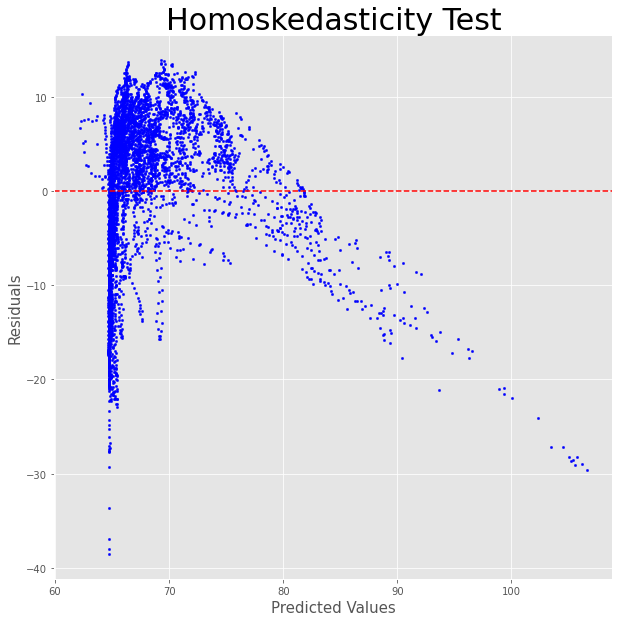

In [59]:
#plot to check for homoskedasticity
fig = plt.figure(figsize=(10,10))

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'blue', s= 5)
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

The above plot suggests the presence of heteroskedasticity.

In [60]:
#Checking for Heteroskedasticity with statistical tests:

#A) White Test
pooled_OLS_dataset = pd.concat([df, residuals_pooled_OLS], axis=1)
pooled_OLS_dataset = pooled_OLS_dataset.drop(['year'], axis = 1).fillna(0)
exog = sm.tools.tools.add_constant(df[['emissions_co2_emissions','emissions_consumed_natural_gas',
                                      'consumption_per_capita','emissions_coal_and_coke']]).fillna(0)
white_test_results = het_white(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))

#B) Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, breusch_pagan_test_results)))

#credit: https://towardsdatascience.com/a-guide-to-panel-data-regression-theoretics-and-implementation-with-python-4c84c5055cf8

{'LM-Stat': 908.9486719520442, 'LM p-val': 5.2213917198208466e-185, 'F-Stat': 80.24664386463432, 'F p-val': 2.6762070678457837e-206}
{'LM-Stat': 31.45490444430332, 'LM p-val': 2.47220274109327e-06, 'F-Stat': 7.908315568166851, 'F p-val': 2.3821616955203534e-06}


P value < 0.05 suggests that there is heteroskedasticity in the model, hence "no homoskedascity" assumption has been violated.

In [61]:
#Checking for Autocorrelation

#Durbin Watson Test

durbin_watson_test_results = durbin_watson(pooled_OLS_dataset['residual']) 
print(durbin_watson_test_results)

1.7827157345276308


There is positive autocorrelation in the model because the durbin watson statistic < 2. The assumptions of homoskedasticy and no autocorrelation have been violated. As such, we have to utilze a fixed effects or random effects model.

In [62]:
#Estimating Fixed Effects and Random Effects Models

exog = sm.tools.tools.add_constant(df[['emissions_co2_emissions','emissions_coal_and_coke',
                                       'emissions_petroleum_and_other_liquids', 'consumption_per_capita']])
endog = df['life_expectancy']
# random effects model
model_re = RandomEffects(endog, exog) 
re_res = model_re.fit() 

# fixed effects model
model_fe = PanelOLS(endog, exog, entity_effects = True) 
fe_res = model_fe.fit() 
#print results
print(re_res)
print(fe_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:        life_expectancy   R-squared:                        0.0803
Estimator:              RandomEffects   R-squared (Between):              0.1422
No. Observations:                4697   R-squared (Within):               0.0490
Date:                Fri, Dec 03 2021   R-squared (Overall):              0.1370
Time:                        14:58:37   Log-likelihood                -1.199e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      102.43
Entities:                         178   P-value                           0.0000
Avg Obs:                       26.388   Distribution:                  F(4,4692)
Min Obs:                       0.0000                                           
Max Obs:                       27.000   F-statistic (robust):             66.525
                            

In [63]:
# function to perform Hausman Test to indicate preferred model
def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    
    

    df= b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B)) 
 
    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval
#credit: https://towardsdatascience.com/a-guide-to-panel-data-regression-theoretics-and-implementation-with-python-4c84c5055cf8

In [64]:
#printing results
hausman_results = hausman(fe_res, re_res) 
print('chi-Squared:' + str(hausman_results[0]))
print('degrees of freedom: ' + str(hausman_results[1]))
print('p-Value: ' + str(hausman_results[2]))

#credit: https://towardsdatascience.com/a-guide-to-panel-data-regression-theoretics-and-implementation-with-python-4c84c5055cf8

chi-Squared:52.156401754700994
degrees of freedom: 5
p-Value: 5.010652111932133e-10


Because the p value is < 0.05, we reject the null hypothesis that the preferred model is random effects. In this case,the fixed effects model is more suitable. 

## Oil Exporting Countries

In [65]:
#Filtering subset of data
oil_exporters = df[df['is_oil_exporter']==1]
oil_exporters.shape

(432, 37)

In [ ]:
#Estimating Fixed Effects and Random Effects Model

exog_oil = sm.tools.tools.add_constant(oil_exporters[['emissions_co2_emissions','emissions_coal_and_coke',
                                       'emissions_petroleum_and_other_liquids', 'consumption_per_capita']])
endog_oil = oil_exporters['life_expectancy']

# random effects model
model_re_oil = RandomEffects(endog_oil, exog_oil) 
re_res_oil = model_re_oil.fit() 

# fixed effects model
model_fe_oil = PanelOLS(endog_oil, exog_oil, entity_effects = True) 
fe_res_oil = model_fe_oil.fit() 

#print results
print(re_res_oil)
print(fe_res_oil)

In [ ]:
#printing results
hausman_results_oil = hausman(fe_res_oil, re_res_oil) 
print('chi-Squared:' + str(hausman_results_oil[0]))
print('degrees of freedom: ' + str(hausman_results_oil[1]))
print('p-Value: ' + str(hausman_results_oil[2]))

## LDCs

In [67]:
#filtering subset of data
ldc = df[df['is_least_developed']==1]
ldc.shape

(1134, 37)

In [68]:
#Fixed Effects and Random Effects Model

exog_ldc = sm.tools.tools.add_constant(ldc[['emissions_co2_emissions','emissions_coal_and_coke', 'consumption_per_capita', "emissions_petroleum_and_other_liquids"]])
endog_ldc = ldc['life_expectancy']

# random effects model
model_re_ldc = RandomEffects(endog_ldc, exog_ldc) 
re_res_ldc = model_re_ldc.fit() 

# fixed effects model
model_fe_ldc = PanelOLS(endog_ldc, exog_ldc, entity_effects = True) 
fe_res_ldc = model_fe_ldc.fit() 

#print results
print(re_res_ldc)
print(fe_res_ldc)

                        RandomEffects Estimation Summary                        
Dep. Variable:        life_expectancy   R-squared:                        0.2406
Estimator:              RandomEffects   R-squared (Between):              0.0474
No. Observations:                1134   R-squared (Within):               0.2473
Date:                Fri, Dec 03 2021   R-squared (Overall):              0.1320
Time:                        15:00:11   Log-likelihood                   -3241.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      89.424
Entities:                         177   P-value                           0.0000
Avg Obs:                       6.4068   Distribution:                  F(4,1129)
Min Obs:                       0.0000                                           
Max Obs:                       27.000   F-statistic (robust):             89.424
                            

In [69]:
#printing results 
hausman_results_ldc = hausman(fe_res_ldc, re_res_ldc) 
print('chi-Squared:' + str(hausman_results_ldc[0]))
print('degrees of freedom: ' + str(hausman_results_ldc[1]))
print('p-Value: ' + str(hausman_results_ldc[2]))

chi-Squared:8.2046063200278
degrees of freedom: 5
p-Value: 0.14531404436440357


# Conclusion and Recommendations